In [1]:
from IPython.display import display, HTML

# Set the width to a specific percentage of the screen width, e.g., 100%
display(HTML('<style>.container { width:100% !important; }</style>'))

In [2]:
from os import path

PROJECT_ROOT = path.abspath(path.join(globals()['_dh'][0], '..'))
DATALAKE_PATH = path.abspath(path.join(PROJECT_ROOT, '..', '..', 'datalake', 'xplainproj'))
FQFN_PROCESSED_DF = path.join(DATALAKE_PATH, 'processed', f'processed_20250207.jsonl')

In [3]:

from xplainproj.trainer import xplain_folder_loader

wtl = xplain_folder_loader.XplainFolderLoader()
wtl.read(DATALAKE_PATH, labels=['0', '1'])

2025-02-07 14:09:10,693 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 14:09:10,704 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True


Creating tasks:   0%|          | 0/2 [00:00<?, ?it/s]

Test files processing:   0%|          | 0/699 [00:00<?, ?it/s]

2025-02-07 14:09:12,935 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 14:09:12,951 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 14:09:12,952 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-07 14:09:12,959 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 14:09:12,965 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-07 14:09:12,974 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-07 14:09:13,015 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 14:09:13,029 - tensorcraft - INFO - Pytorch version=2.6.0 preferred device=mps build with MPS support=True
2025-02-07 14:09:13,033 - tensorcraft - INFO - XLA Device Not Supported: No module named 'torch_xla'
2025-02-07 14:09:13,050

In [4]:
df = wtl.df
df_filtered = df.loc[:, df.columns != 'fqfn']
df_filtered

,file_name,text_body,label,longest_code_line_length,median_code_line_length,lines_of_code,code_size_in_bytes,ratio_of_comments_to_code,is_64base_content_present,file_name_embedding
0,1289.ps1,\nfunction Get-CMsmqMessageQueue\n{\n \n ...,0,1.0,1.0,9.312883,9.312883,-0.11,False,"[-0.68170124, -0.5240398, 0.14555997, 0.277613..."
1,1277.ps1,\nfunction Unlock-CIisConfigurationSection\n{\...,0,1.0,1.0,9.394463,9.394463,-0.11,False,"[-0.67740905, -0.50768083, 0.12951225, 0.27923..."
2,1276.ps1,\nfunction Get-CServiceConfiguration\n{\n \...,0,1.0,1.0,9.843921,9.843921,-0.11,False,"[-0.71440804, -0.5147519, 0.1863003, 0.2973973..."
3,1288.ps1,\nfunction Set-CIisWebsiteSslCertificate\n{\n ...,0,1.0,1.0,10.145932,10.145932,-0.10,False,"[-0.6912794, -0.5168141, 0.1529255, 0.31653935..."
4,1128.ps1,\n\n\n\n\n\n\n\n\n\n\n\n$CategoryName = 'Carbo...,0,1.0,1.0,12.735556,12.735556,-0.08,False,"[-0.6452092, -0.48694083, 0.19878276, 0.273706..."
...,...,...,...,...,...,...,...,...,...,...
694,1119.ps1,"\n$c = '[DllImport(""kernel32.dll"")]public stat...",1,1.0,1.0,11.126059,11.126059,-0.09,False,"[-0.67220056, -0.51332784, 0.18868119, 0.26989..."
695,1131.ps1,\n(New-Object System.Net.WebClient).DownloadFi...,1,1.0,1.0,6.894818,6.894818,-0.15,False,"[-0.6734812, -0.50028735, 0.19662182, 0.270875..."
696,1125.ps1,\nif([IntPtr]::Size -eq 4){$b='powershell.exe'...,1,1.0,1.0,11.191059,11.191059,-0.09,False,"[-0.6641204, -0.4933321, 0.22922564, 0.2781344..."
697,102.ps1,"\n$c = '[DllImport(""kernel32.dll"")]public stat...",1,1.0,1.0,11.126059,11.126059,-0.09,False,"[-0.68433297, -0.49844956, 0.34662682, 0.34134..."


<Axes: >

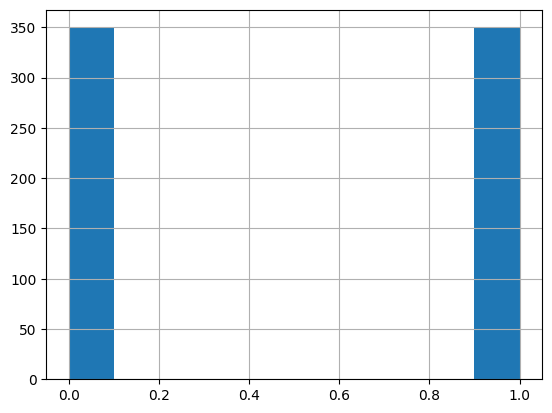

In [5]:
df['label'].hist()

In [6]:
for label in df['label'].unique():
    sampled_df = df[df['label'] == label]['file_name_embedding'].sample(n=10)
    print(f'Sampled DataFrame for label {label}:')
    display(sampled_df)

Sampled DataFrame for label 0:


85     [-0.6748235, -0.5313982, 0.15605262, 0.2386262...
29     [-0.6501541, -0.5253123, 0.21243346, 0.2453552...
135    [-0.66892433, -0.5526089, 0.23493588, 0.224602...
330    [-0.6687786, -0.49331328, 0.21973711, 0.263673...
23     [-0.6707593, -0.52573353, 0.18750054, 0.255823...
59     [-0.67081964, -0.512494, 0.18709916, 0.2675884...
62     [-0.73007417, -0.5328053, 0.20780486, 0.232644...
65     [-0.6062789, -0.50962275, 0.21238597, 0.259962...
140    [-0.6760646, -0.5211325, 0.17751959, 0.2944951...
31     [-0.5745904, -0.4959263, 0.2570765, 0.23708212...
Name: file_name_embedding, dtype: object

Sampled DataFrame for label 1:


597    [-0.69316715, -0.5269675, 0.14606366, 0.278490...
642    [-0.71117985, -0.5320089, 0.14168616, 0.250154...
459    [-0.6790581, -0.52080566, 0.18543118, 0.283787...
404    [-0.61501515, -0.55158585, 0.2552476, 0.188160...
653    [-0.6755592, -0.48594037, 0.18962878, 0.282367...
415    [-0.64558935, -0.49381068, 0.25212336, 0.27154...
355    [-0.67176485, -0.52494806, 0.20662947, 0.27977...
394    [-0.6975799, -0.5117605, 0.3421964, 0.3185631,...
544    [-0.68289286, -0.51602745, 0.16400868, 0.27763...
610    [-0.72897923, -0.4895496, 0.33264267, 0.346378...
Name: file_name_embedding, dtype: object

In [7]:
df.to_json(FQFN_PROCESSED_DF, orient='records', lines=True)